# **Video Game Sales Data Analytics** 

## Importing and Preprocessing

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [65]:
d=pd.read_csv("vgsales.csv")
X1 = d.iloc[:, 0:5].values
X = d.iloc[:, 6:-1].values
y = d.iloc[:,-1 ].values
print(tf.__version__)

2.4.1


In [66]:
d.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [87]:
print(d.shape)

(16291, 11)


In [107]:
d.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [68]:
d['Name'] = d['Name'].astype('category')
d['Name'].dtypes

CategoricalDtype(categories=[''98 Koshien', '.hack//G.U. Vol.1//Rebirth',
                  '.hack//G.U. Vol.2//Reminisce',
                  '.hack//G.U. Vol.2//Reminisce (jp sales)',
                  '.hack//G.U. Vol.3//Redemption', '.hack//Infection Part 1',
                  '.hack//Link', '.hack//Mutation Part 2',
                  '.hack//Outbreak Part 3',
                  '.hack//Quarantine Part 4: The Final Chapter',
                  ...
                  'nail'd', 'pro evolution soccer 2011', 'th!nk Logic Trainer',
                  'thinkSMART', 'thinkSMART FAMILY!',
                  'thinkSMART: Chess for Kids', 'uDraw Studio',
                  'uDraw Studio: Instant Artist', 'wwe Smackdown vs. Raw 2006',
                  '¡Shin Chan Flipa en colores!'],
                 ordered=False)

In [69]:
n = d.nunique(axis=0)
n

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [70]:
d.dropna(inplace = True)

In [71]:
# d["Publisher"] = d["Publisher"].astype(str).str.replace('<',' ')

In [72]:
# d["Publisher"].dtype

## Missing Data Fixed

In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

## Label Encoding

In [74]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X[:,1:2] = np.array(ct.fit_transform(X[:,1:2]))
# X[:,4:5] = np.array(ct.fit_transform(X[:,4:5]))

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1[:, 1] = le.fit_transform(X1[:, 1])
X1[:, 2] = le.fit_transform(X1[:, 2])
X1[:, 4] = le.fit_transform(X1[:, 4])

In [76]:
X[:,1]

array([2.902e+01, 3.580e+00, 1.288e+01, ..., 0.000e+00, 1.000e-02,
       0.000e+00])

## Splitting the Dataset into Training and Test Set

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [78]:
print(X_train)
print(X_test)

[[0.1  0.03 0.   0.  ]
 [0.01 0.   0.   0.  ]
 [0.05 0.02 0.   0.  ]
 ...
 [0.   0.   0.12 0.  ]
 [0.08 0.01 0.   0.01]
 [0.41 0.21 0.   0.14]]
[[0.47 0.53 0.03 0.22]
 [0.08 0.06 0.19 0.02]
 [0.09 0.06 0.11 0.02]
 ...
 [0.03 0.01 0.   0.  ]
 [0.07 0.   0.   0.01]
 [0.05 0.05 0.   0.01]]


In [79]:
print(y_train)
print(y_test)

[0.13 0.01 0.07 ... 0.12 0.1  0.75]
[1.25 0.34 0.27 ... 0.04 0.08 0.11]


## Feature Scaling


In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Plots

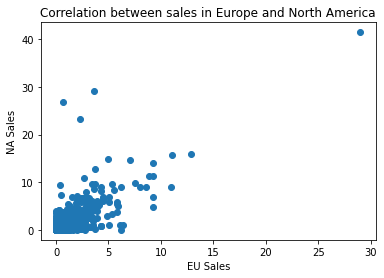

In [146]:
a=d["EU_Sales"]
b=d["NA_Sales"]
plt.scatter(a,b)
# plt.plot(X_train, regressor.predict(X), color = 'blue')
plt.title('Correlation between sales in Europe and North America')
plt.xlabel('EU Sales');
plt.ylabel('NA Sales');

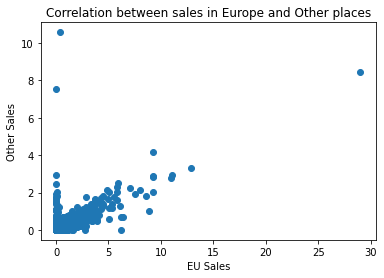

In [147]:
a=d["EU_Sales"]
b=d["Other_Sales"]
plt.scatter(a,b)
# plt.plot(X_train, regressor.predict(X), color = 'blue')
plt.title('Correlation between sales in Europe and Other places')
plt.xlabel('EU Sales');
plt.ylabel('Other Sales');

In [148]:
visited = []
d1=d['Genre'].tolist()
for i in range(0, len(d1)):
    if d1[i] not in visited: 
        visited.append(d1[i])
print("unique values :", visited)

unique values : ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']


In [149]:
d2={}
d2[0]=d["Genre"].isin(['Sports']).sum(axis=0)
d2[1]=d["Genre"].isin(['Platform']).sum(axis=0)
d2[2]=d["Genre"].isin(['Racing']).sum(axis=0)
d2[3]=d["Genre"].isin(['Role-Play']).sum(axis=0)
d2[4]=d["Genre"].isin(['Puzzle']).sum(axis=0)
d2[5]=d["Genre"].isin(['Misc']).sum(axis=0)
d2[6]=d["Genre"].isin(['Shooter']).sum(axis=0)
d2[7]=d["Genre"].isin(['Simulation']).sum(axis=0)
d2[8]=d["Genre"].isin(['Action']).sum(axis=0)
d2[9]=d["Genre"].isin(['Fighting']).sum(axis=0)
d2[10]=d["Genre"].isin(['Adventure']).sum(axis=0)
d2[11]=d["Genre"].isin(['Strategy']).sum(axis=0)
d2

{0: 2304,
 1: 875,
 2: 1225,
 3: 0,
 4: 570,
 5: 1686,
 6: 1282,
 7: 848,
 8: 3251,
 9: 836,
 10: 1274,
 11: 670}

## Searching and Plots

Enter the name of the game:Wii Sports
Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object


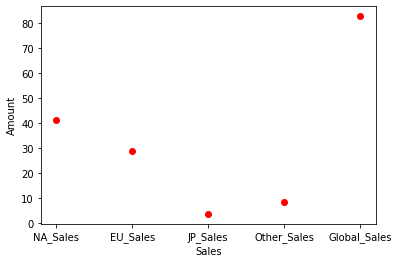

In [88]:
x = input("Enter the name of the game:")
i=0
j=0
d1 = d["Name"].tolist()
while (i<16291):
      if x == d1[i] :
        print(d.loc[i,:])
        y=np.array([d.iloc[i]['NA_Sales'],d.iloc[i]['EU_Sales'],d.iloc[i]['JP_Sales'],d.iloc[i]['Other_Sales'],d.iloc[i]["Global_Sales"]])
        l= ["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
        plt.plot(l,y,'ro')
        plt.xlabel('Sales');
        plt.ylabel('Amount');
        plt.show
      elif ( i == 16588 ):
        print("No such game found")
      i=i+1

Enter the name of the game:Wii Sports Resort
Rank                            4
Name            Wii Sports Resort
Platform                      Wii
Year                         2009
Genre                      Sports
Publisher                Nintendo
NA_Sales                    15.75
EU_Sales                    11.01
JP_Sales                     3.28
Other_Sales                  2.96
Global_Sales                   33
Name: 3, dtype: object
15.75


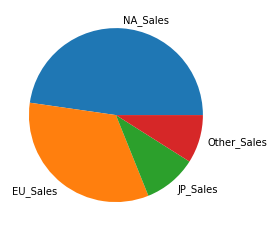

In [89]:
x = input("Enter the name of the game:")
i=0
j=0
d1 = d["Name"].tolist()
while (i<16291):
      if x == d1[i] :
        print(d.loc[i,:])
        print(d.iloc[i]['NA_Sales'])
        y=np.array([d.iloc[i]['NA_Sales'],d.iloc[i]['EU_Sales'],d.iloc[i]['JP_Sales'],d.iloc[i]['Other_Sales']])
        l= ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]
        plt.pie(y,labels=l)
        plt.show
      elif ( i == 16588 ):
        print("No such game found")
      i=i+1

In [90]:
x = input("Enter the column name except global sales(Excluding Wii Sports) :")
c = input("1 for max 2 for min :")
i=1
j=0
max=0
min=100000000000
d1 = d[x].tolist()
if c=="1" :
  while (i<16291):
      if d1[i]>max :
        max=d1[i]
        j=i
      i=i+1
elif c=="2" :
  while (i<16598):
      if d1[i]<min :
        min=d1[i]
        j=i
      i=i+1
else :
  print("Enter number 1 or 2 please")
print(d.loc[j,:])

Enter the column name except global sales(Excluding Wii Sports) :EU_Sales
1 for max 2 for min :1
Rank                         3
Name            Mario Kart Wii
Platform                   Wii
Year                      2008
Genre                   Racing
Publisher             Nintendo
NA_Sales                 15.85
EU_Sales                 12.88
JP_Sales                  3.79
Other_Sales               3.31
Global_Sales             35.82
Name: 2, dtype: object


##Linear Regression

In [150]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
y_pred = lr.predict(X_test)

In [152]:
from sklearn.metrics import r2_score
r2_Linear = r2_score(y_test,y_pred)
print(r2_Linear)

0.999986615586665


## Multi Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression
mregressor = LinearRegression()
mregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_pred = mregressor.predict(X_test)

In [163]:
y_pred.shape

(5533,)

In [164]:
X_test

array([[ 0.25010209,  0.7172235 , -0.1533691 ,  0.83006249],
       [-0.22565889, -0.16497798,  0.35080814, -0.13976365],
       [-0.21345989, -0.16497798,  0.09871952, -0.13976365],
       ...,
       [-0.28665389, -0.2588292 , -0.24790233, -0.23674626],
       [-0.23785789, -0.27759944, -0.24790233, -0.18825495],
       [-0.26225589, -0.18374822, -0.24790233, -0.18825495]])

In [165]:
from sklearn.metrics import r2_score
r2_MLinear = r2_score(y_test,y_pred)
print(r2_MLinear)

0.999986615586665


## Polynomial Regression

In [180]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [181]:
from sklearn.metrics import r2_score
r2_RLinear = r2_score(y_test,y_pred)
print(r2_RLinear)

0.9849428232929323


## Non Linear SVM

In [166]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [167]:
y_pred = regressor.predict(X_test)

In [168]:
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

0.6939552217455672


## Decision Tree

In [169]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [170]:
y_pred=dt.predict(X_test)

In [171]:
r2_dt=r2_score(y_test,y_pred)
print(r2_dt)

0.9581222966409768


## Random Forest

In [172]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [173]:
y_pred = rf.predict(X_test)

In [174]:
r2_rf = r2_score(y_test,y_pred)
print(r2_rf)

0.9849428232929323


## Comparing r2 scores

In [177]:
labelList = ['Linear Regression','Multiple Linear Reg.','Polynomial Reg.','Decision Tree','Random Forest','Non-Linear SVR']
mylist = [r2_Linear,r2_MLinear,r2_RLinear,r2_NonlinearSVR,r2_rf,r2_dt]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[99.999, 99.999, 98.494, 69.396, 98.494, 95.812]


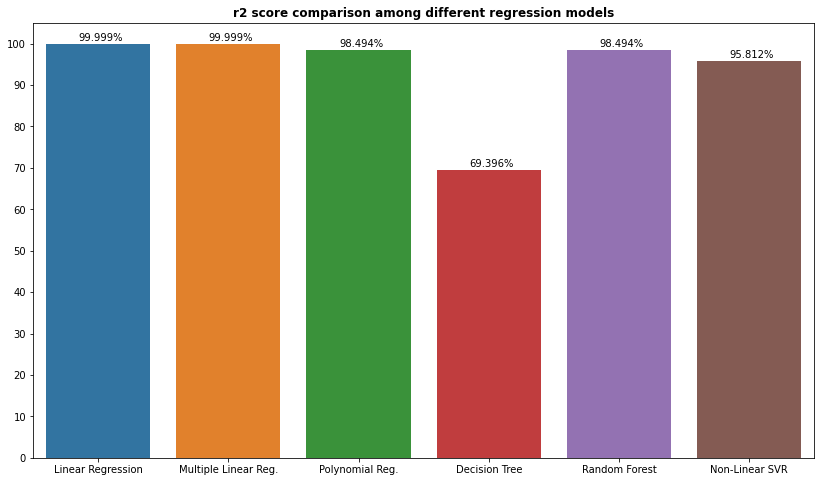

In [178]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

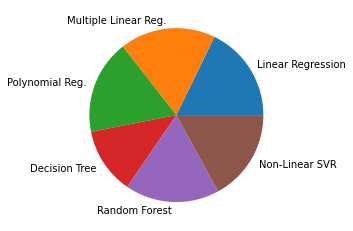

In [179]:
plt.pie(mylist,labels=labelList)
plt.show()